# Generating Rest Frame SEDs from a Parametric Galaxy including dust emission
<br>
Example for generating the rest-frame spectrum for a parametric galaxy including dust emission


In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from synthesizer.filters import FilterCollection
from synthesizer.grid import Grid
from synthesizer.parametric.sfzh import SFH, ZH, generate_sfzh
from synthesizer.parametric.galaxy import Galaxy
from synthesizer.plt import single, single_histxy, mlabel
from synthesizer.dust.emission import Greybody
from unyt import yr, Myr, K
from astropy.cosmology import Planck18 as cosmo

In [50]:
# Define the grid
grid_name = "test_grid"
grid_dir = "../synthesizer/tests/test_grid"
grid = Grid(grid_name, grid_dir=grid_dir)
print(grid)

------------------------------
SUMMARY OF GRID
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ] 
metallicity: [1.0e-05 1.0e-04 1.0e-03 2.0e-03 3.0e-03 4.0e-03 6.0e-03 8.0e-03 1.0e-02
 1.4e-02 2.0e-02 3.0e-02 4.0e-02] 
C: Dopita2006 
CMB: False 
N: Dopita2006 
T_floor: 100 
U_model: ref 
alpha: 0.0 
axes: ['log10age' 'metallicity'] 
cloudy_version: c17.03 
cosmic_rays: True 
covering_factor: 1.0 
d2m: 0.3 
geometry: spherical 
grains: True 
imf_masses: [1.e-01 3.e+02] 
imf_slopes:  
imf_type: chabrier03 
iterate_to_convergence: False 
log10U_ref: -2 
log10age: [ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1


In [51]:
# define the parameters of the star formation and metal enrichment histories
sfh_p = {'duration': 10 * Myr}
Z_p = {'log10Z': -2.0}  # can also use linear metallicity e.g. {'Z': 0.01}
stellar_mass = 1E8

# define the functional form of the star formation and metal enrichment histories
sfh = SFH.Constant(sfh_p)  # constant star formation
Zh = ZH.deltaConstant(Z_p)  # constant metallicity

# get the 2D star formation and metal enrichment history for the given SPS grid. This is (age, Z).
sfzh = generate_sfzh(grid.log10age, grid.metallicity, sfh, Zh, stellar_mass=stellar_mass)

# create a galaxy object
galaxy = Galaxy(sfzh)

Let's generate some spectra, including nebular emission and dust attenuation (but not yet dust emission):

In [52]:

galaxy.get_spectra_screen(grid, tau_v = 0.3)

Let's see what spectra we've created:

In [53]:
print(galaxy)

----------
SUMMARY OF PARAMETRIC GALAXY
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⡀⠒⠒⠦⣄⡀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⢀⣤⣶⡾⠿⠿⠿⠿⣿⣿⣶⣦⣄⠙⠷⣤⡀⠀⠀⠀⠀
        ⠀⠀⠀⣠⡾⠛⠉⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⣿⣷⣄⠘⢿⡄⠀⠀⠀
        ⠀⢀⡾⠋⠀⠀⠀⠀⠀⠀⠀⠀⠐⠂⠠⢄⡀⠈⢿⣿⣧⠈⢿⡄⠀⠀
        ⢀⠏⠀⠀⠀⢀⠄⣀⣴⣾⠿⠛⠛⠛⠷⣦⡙⢦⠀⢻⣿⡆⠘⡇⠀⠀
        ---+-+-+-+-+-+-+-+-+-+-+-+---
           |S|Y|N|T|H|E|S|I|Z|E|R|
        ---+-+-+-+-+-+-+-+-+-+-+-+---
        ⠀⠀⢸⡇⠸⣿⣷⠀⢳⡈⢿⣦⣀⣀⣀⣠⣴⣾⠟⠁⠀⠀⠀⠀⢀⡎
        ⠀⠀⠘⣷⠀⢻⣿⣧⠀⠙⠢⠌⢉⣛⠛⠋⠉⠀⠀⠀⠀⠀⠀⣠⠎⠀
        ⠀⠀⠀⠹⣧⡀⠻⣿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⡾⠃⠀⠀
        ⠀⠀⠀⠀⠈⠻⣤⡈⠻⢿⣿⣷⣦⣤⣤⣤⣤⣤⣴⡾⠛⠉⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠈⠙⠶⢤⣈⣉⠛⠛⠛⠛⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀
        ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
<class 'synthesizer.parametric.galaxy.Galaxy'>
log10(stellar mass formed/Msol):             8.0
available SEDs: ['incident', 'transmitted', 'nebular', 'reprocessed', 'intrinsic', 'emergent']
available lines: []
available images: []
----------



Let's plot some of those spectra:

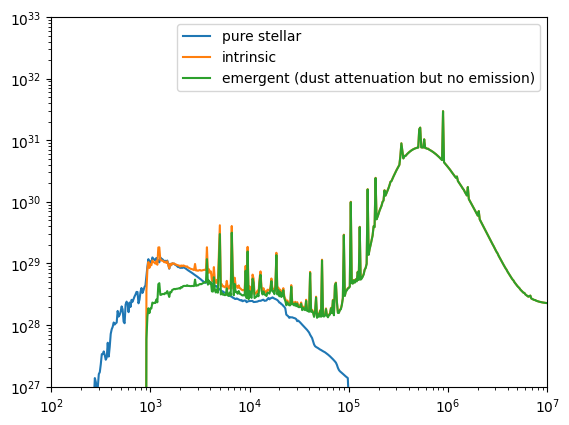

In [54]:
plt.loglog(galaxy.spectra['incident'].lam, galaxy.spectra['incident'].lnu, label = 'pure stellar')
plt.loglog(galaxy.spectra['intrinsic'].lam, galaxy.spectra['intrinsic'].lnu, label = 'intrinsic')
plt.loglog(galaxy.spectra['emergent'].lam, galaxy.spectra['emergent'].lnu, label = 'emergent (dust attenuation but no emission)')
plt.xlim([100, 1E7])
plt.ylim([1E27, 1E33])
plt.legend()

Let's define a dust emisison emission model, in this case a simple Grebody with T = 50K and emissivity = 1.5. Let's then generate the spectra using that dust model assuming energy balance and plot them alongside our intrinsic spectrum:

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


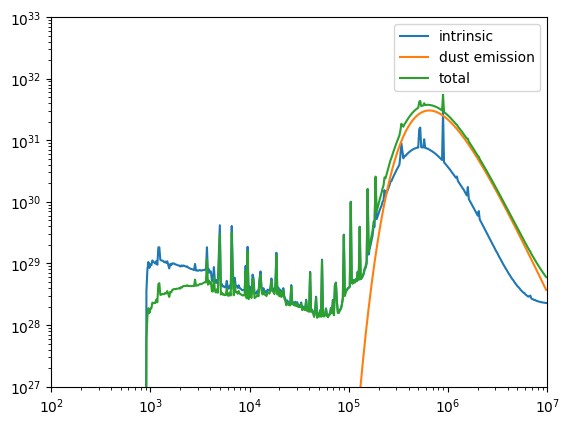

In [55]:
emissionmodel = Greybody(50*K, 1.5)
galaxy.get_spectra_dust(emissionmodel)
plt.loglog(galaxy.spectra['intrinsic'].lam, galaxy.spectra['intrinsic'].lnu, label = 'intrinsic')
plt.loglog(galaxy.spectra['dust'].lam, galaxy.spectra['dust'].lnu, label = 'dust emission')
plt.loglog(galaxy.spectra['total'].lam, galaxy.spectra['total'].lnu, label = 'total')
plt.xlim([100, 1E7])
plt.ylim([1E27, 1E33])
plt.legend()

Let's now calcualte the observed spectrum by specifying the redshift and (optionally) an IGM absorption model. We'll focus on just our `total` spectra.

In [56]:

sed = galaxy.spectra['total']
from astropy.cosmology import Planck18 as cosmo # import cosmology
from synthesizer.igm import Madau96 # import Madau96 IGM absorption mode
z = 10.  # redshift
sed.get_fnu(cosmo, z, igm=Madau96())  # generate observed frame spectra
print(sed)
print(sed.fnu) 
print(sed.lam)
print(sed.obslam)

----------
SUMMARY OF SED 
Number of wavelength points: 600 
----------
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


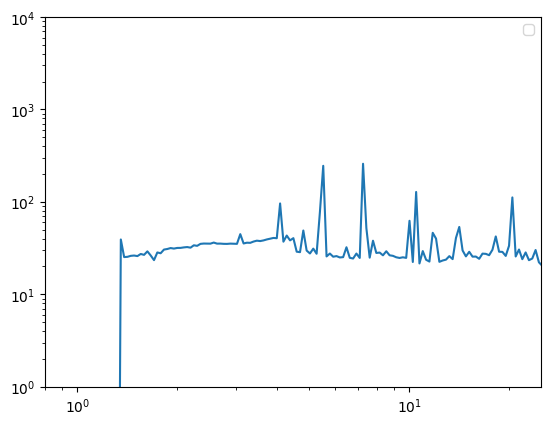

In [57]:

plt.loglog(sed.obslam/1E4, sed.fnu.to('nJy')) # there is a bug here since obslam should have units, here convert from Angstrom to um
plt.xlim([0.8, 25]) # um
plt.ylim([1, 10000])
plt.legend()

Let's now define a collection of filters to apply to this SED. See the Filters tutorial for more detail about `Filter` and `FilterCollection` objects. Let's use the JWST/NIRCam wide filters:

In [58]:
filter_codes = [f'JWST/NIRCam.{f}' for f in ['F070W','F090W', 'F115W', 'F150W',
                                             'F200W', 'F277W', 'F356W', 'F444W']]  # define a list of filter codes
fc = FilterCollection(filter_codes, new_lam=grid.lam)

Now let's calculated the flux in those filters:

In [59]:
# measure broadband fluxes
fluxes = sed.get_broadband_fluxes(fc)

# print broadband fluxes
for filter in fc:
    print(f'{filter.filter_code} {filter.pivwv():.0f} {fluxes[filter.filter_code]:.2f}')


JWST/NIRCam.F070W 7039 -0.00 nJy
JWST/NIRCam.F090W 9022 0.00 nJy
JWST/NIRCam.F115W 11543 0.00 nJy
JWST/NIRCam.F150W 15007 27.32 nJy
JWST/NIRCam.F200W 19886 31.21 nJy
JWST/NIRCam.F277W 27617 36.08 nJy
JWST/NIRCam.F356W 35684 38.18 nJy
JWST/NIRCam.F444W 44043 43.40 nJy


Let's plot those on the SED above:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


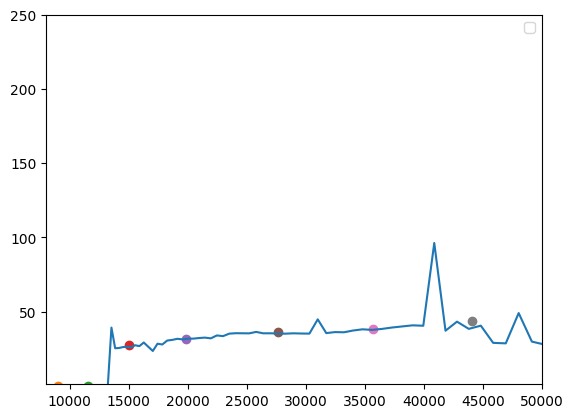

In [60]:
plt.plot(sed.obslam, sed.fnu.to('nJy')) 

for filter in fc:
    plt.scatter(filter.pivwv(), fluxes[filter.filter_code])

plt.xlim([8000, 50000]) #Angstrom
plt.ylim([1, 250])
plt.legend()

With these fluxes we could now do some SED fitting!